## IV characteristics measurement at room temperature with 100M ohm resistor connected between pin 1&2

## Data acquisition with NIDAQ

In [3]:
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
%matplotlib inline

#Constant values

gain = 1e8 # gain of the preamps

# Data collection with NIDAQ at maximum sampling rate

rs_acqu = 1e6 # sampling rate in Hz
t_acqu = 5 # acquisition time in second
ns_acqu = int(rs_acqu*t_acqu)
t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


with nidaqmx.Task() as acqu_task:
    # Set acquisition channels and specs
    # Change the voltage range if necessary
    acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-1,max_val=1)
    acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

    # Start acquisition
    acqu_task.start()
    
    # Collect the data measured
    current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
    current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion

    # Stop acquisition
    acqu_task.stop()
    

# Time averaging and plotting
Applied bias = 0 V

Text(0.5, 0, 'time (sec)')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


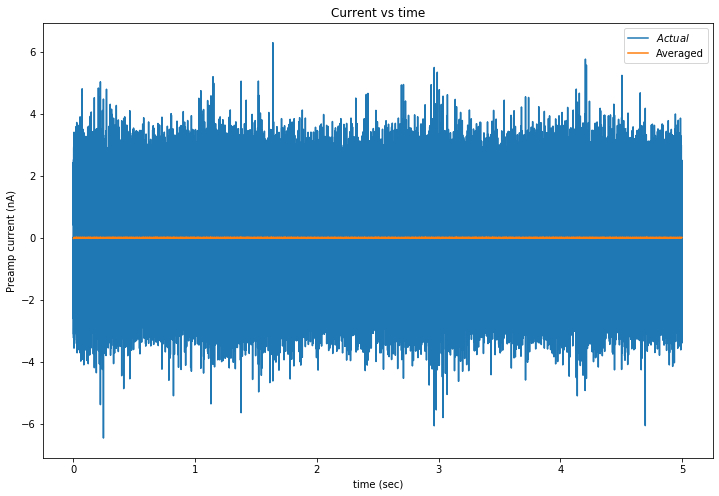

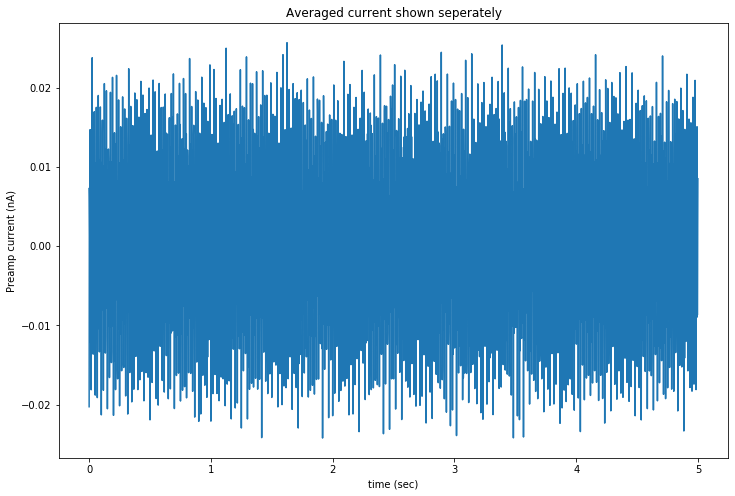

In [5]:
# Averaging to get a desired sampling rate (Similar to sampling rate conversion)

rs_desired = 1e3 #desired sampling rate
n_pointstoaverage = int(rs_acqu/rs_desired) # number of points to be averaged
ns_desired = int(rs_desired*t_acqu) # total number of points for the collected signal in the desired rate
t_desired = np.arange(start=0, stop=t_acqu, step=1/rs_desired)
i_desired = np.zeros(ns_desired)

for index in np.arange(ns_desired):
    i_desired[index] = current_i[index*n_pointstoaverage:(index+1)*n_pointstoaverage].mean()
    
plt.figure(figsize=(12,8))
plt.title('Current vs time')


plt.plot(t,current_i)
plt.plot(t_desired, i_desired)
plt.legend(['$Actual$', 'Averaged'])
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

plt.figure(figsize=(12,8))
plt.plot(t_desired, i_desired)
plt.title('Averaged current shown seperately')
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

                 Observation: 200 times smaller in range compared to the original one
                 

## Frequency response comparison
Applied bias = 0 V

Text(0.5, 1.0, 'Frequency response of the actual signal')

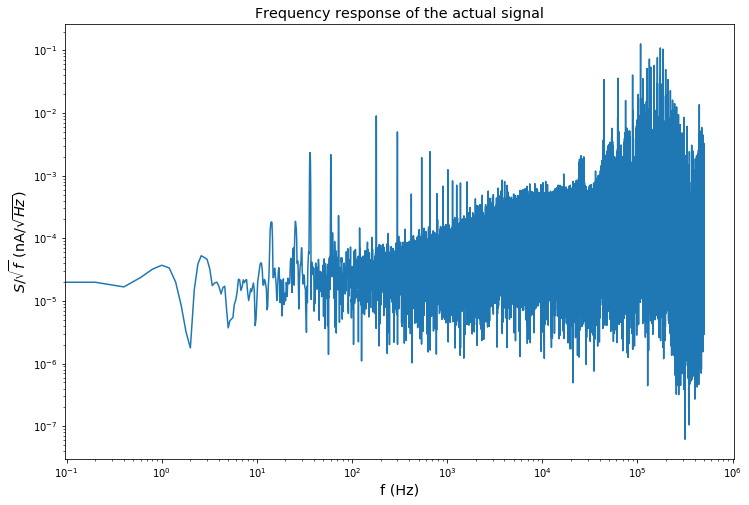

In [23]:
f,II_den=signal.periodogram(current_i,fs=rs_acqu,window='flattop',scaling='density',return_onesided=True)
plt.figure(figsize=(12,8))
plt.loglog(f,np.sqrt(II_den))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the actual signal',fontsize='x-large')

Text(0.5, 1.0, 'Frequency response of the averaged signal')

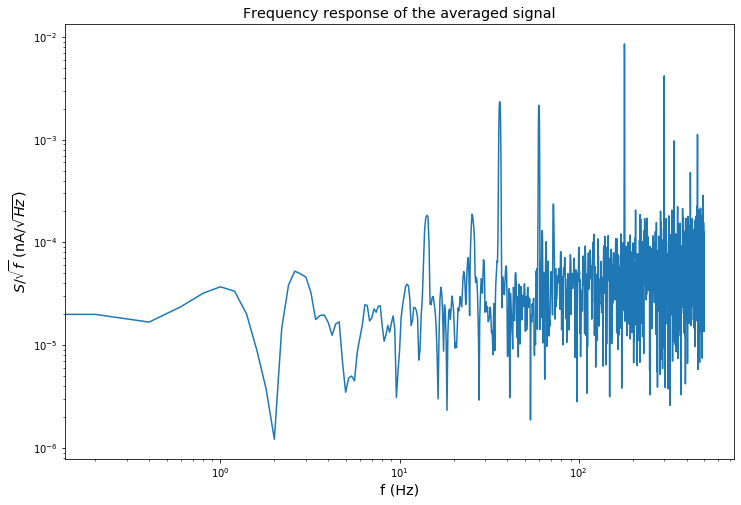

In [24]:
f_desired,II_den_desired=signal.periodogram(i_desired,fs=rs_desired,window='flattop',scaling='density',return_onesided=True)
plt.figure(figsize=(12,8))
plt.loglog(f_desired,np.sqrt(II_den_desired))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the averaged signal',fontsize='x-large')

## plotting them together

Text(0.5, 1.0, 'Frequency response')

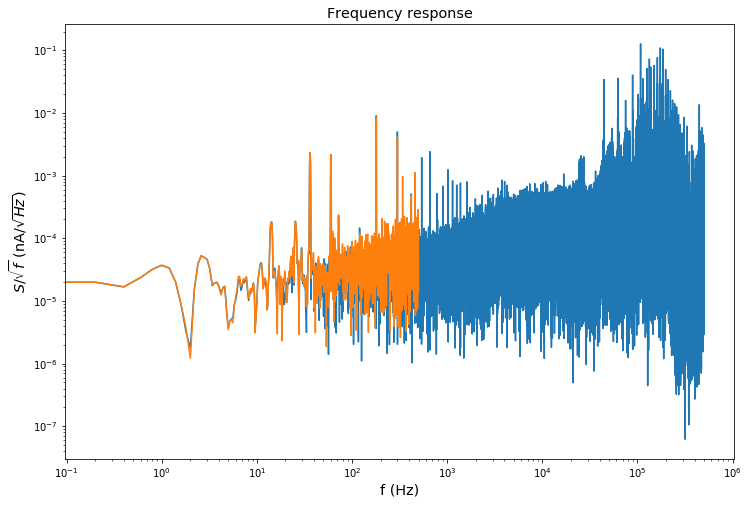

In [27]:
plt.figure(figsize=(12,8))
plt.loglog(f,np.sqrt(II_den))
plt.loglog(f_desired,np.sqrt(II_den_desired))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response',fontsize='x-large')

## Observation
No difference is noted.
Different frequncy range is due to differnt sampling frequencies: <br>
$F_{s,actual} / 2 = 0.5$ MHz and $F_{s,averaged}/2 = 500$ Hz <br>
<br>

$\textbf{Note}:$ The averaging windows have no overlap. Let's see what happens when we take a moving average with overlapping windows.

## Moving average with 50% overlap

Text(0.5, 0, 'time (sec)')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


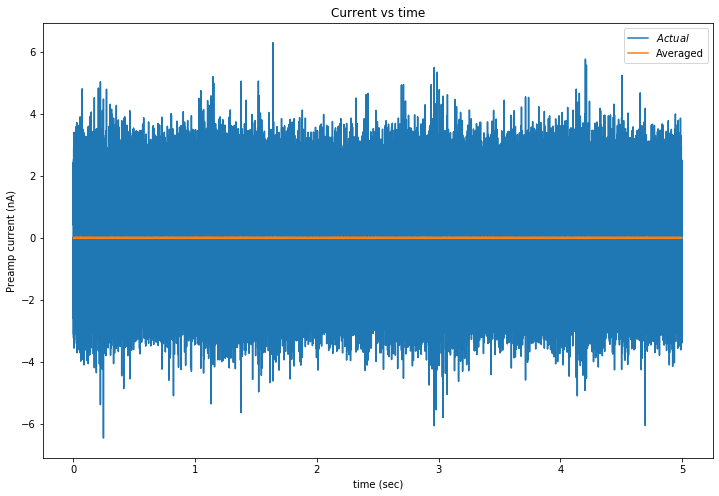

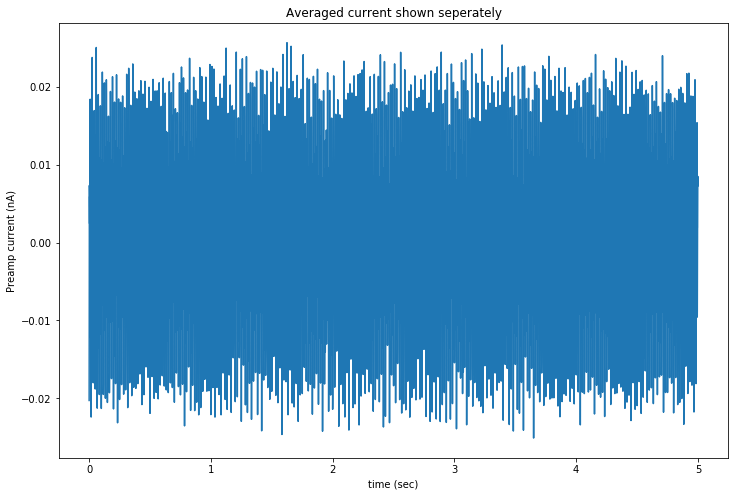

In [30]:
# Averaging to get a desired sampling rate (Similar to sampling rate conversion)

rs_desired = 1e3 #desired sampling rate
n_pointstoaverage = int(rs_acqu/rs_desired) # number of points to be averaged
overlap_factor = int(2)  # 1/overlap_percentage
ns_desired = int(rs_desired*t_acqu*overlap_factor) # total number of points for the collected signal in the desired rate
t_desired = np.arange(start=0, stop=t_acqu, step=1/(overlap_factor*rs_desired))
i_desired = np.zeros(ns_desired)

for index in np.arange(ns_desired):
    i_desired[index] = current_i[int(overlap*index*n_pointstoaverage):int((overlap*index+1)*n_pointstoaverage)].mean()
    
plt.figure(figsize=(12,8))
plt.title('Current vs time')


plt.plot(t,current_i)
plt.plot(t_desired, i_desired)
plt.legend(['$Actual$', 'Averaged'])
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

plt.figure(figsize=(12,8))
plt.plot(t_desired, i_desired)
plt.title('Averaged current shown seperately')
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

Frequecy response

Text(0.5, 1.0, 'Frequency response of the actual signal')

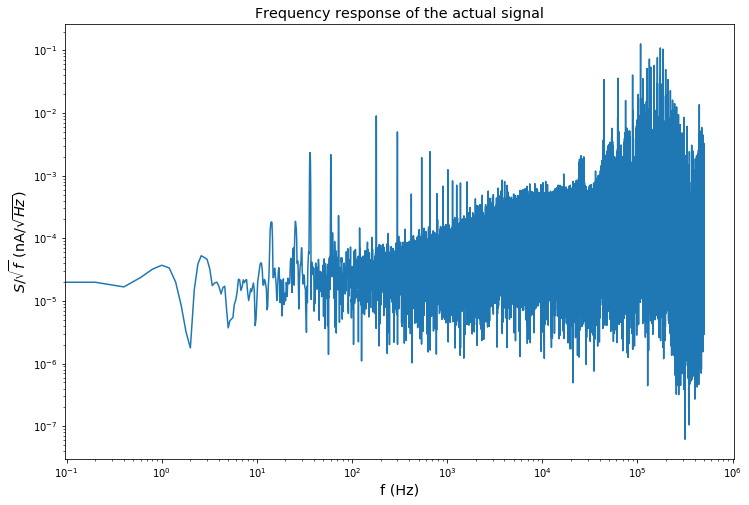

In [31]:
f,II_den=signal.periodogram(current_i,fs=rs_acqu,window='flattop',scaling='density',return_onesided=True)
plt.figure(figsize=(12,8))
plt.loglog(f,np.sqrt(II_den))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the actual signal',fontsize='x-large')

Text(0.5, 1.0, 'Frequency response of the averaged signal')

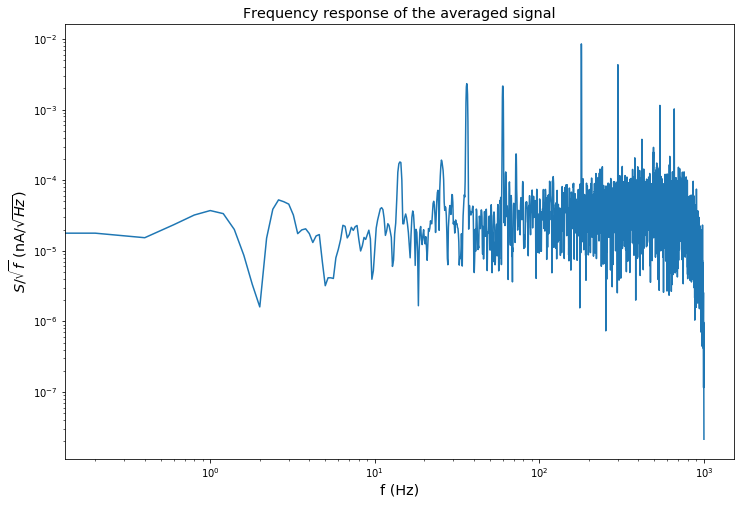

In [32]:
f_desired,II_den_desired=signal.periodogram(i_desired,fs=overlap_factor*rs_desired,window='flattop',scaling='density',return_onesided=True)
plt.figure(figsize=(12,8))
plt.loglog(f_desired,np.sqrt(II_den_desired))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the averaged signal',fontsize='x-large')

Text(0.5, 1.0, 'Frequency response')

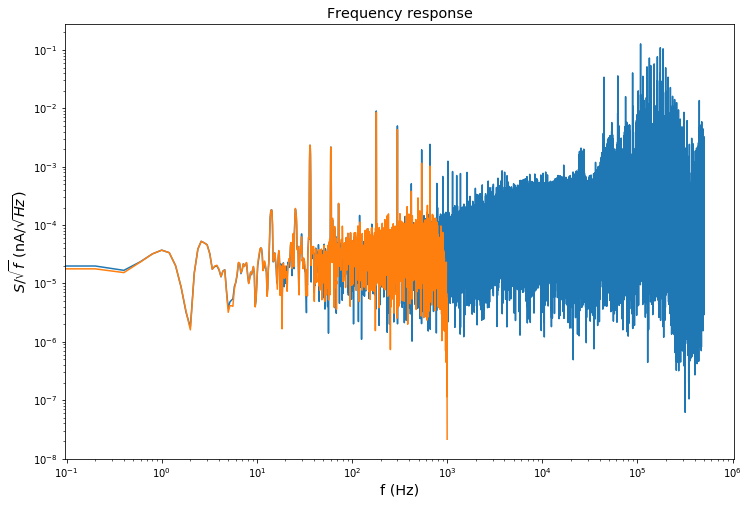

In [33]:
plt.figure(figsize=(12,8))
plt.loglog(f,np.sqrt(II_den))
plt.loglog(f_desired,np.sqrt(II_den_desired))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response',fontsize='x-large')

Frequencies with higher values are:  [ 35.6  35.8  36.   36.2  36.4  36.6  36.8  59.4  59.6  59.8  60.   60.2
  60.4  60.6 179.4 179.6 179.8 180.  180.2 180.4 180.6 299.4 299.6 299.8
 300.  300.2 300.4 300.6 419.8 420.  539.4 539.6 539.8 540.  540.2 540.4
 659.6 659.8 660.  660.2 660.4]


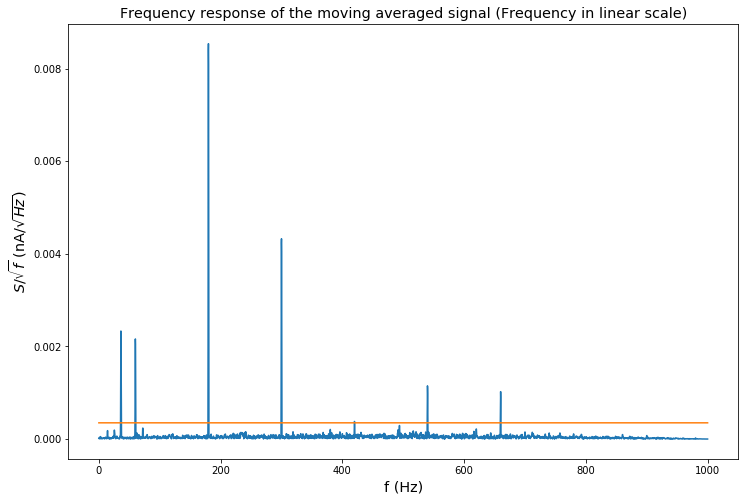

In [57]:
threshold_value = 0.00035
plt.figure(figsize=(12,8))
plt.plot(f_desired,np.sqrt(II_den_desired))
plt.plot(f_desired, threshold_value*np.ones(f_desired.size))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the moving averaged signal (Frequency in linear scale)',fontsize='x-large')

positions = np.where(np.sqrt(II_den_desired)>=threshold_value)
print('Frequencies with higher values are: ', f_desired[positions])

            f= {35, 60, 180, 300, 420, 540, 660} Hz
            I can't explain why there is a peak at 35 Hz. The other frequencies are harmonics of 60 Hz.

## Initiating QDevil QDAC channel 1
Applying a sinusoidal wave, $v(t)= V_{max} \sin{2\pi f t}$ <br>
$V_{max}=10$ mV and $f=10$ Hz

In [59]:
# qdacExample.py
# Copyright QDevil ApS, 2018, 2019
VERSION = "1.21"

import qdac
import random
import math

with qdac.qdac('COM3') as q:
    print("QDAC Serial number: %s" % q.getSerialNumber())
    print("Number of channels: %d" % q.getNumberOfChannels())

    print("-----------------------------------------------")
    print("Setting Channel 1 voltage range to 10 V")
    result = q.setVoltageRange(channel=1, theRange=10)

QDAC Serial number: QDAC132401
Number of channels: 24
-----------------------------------------------
Setting Channel 1 voltage range to 1 V


In [60]:
with qdac.qdac('COM3') as q:
    q.restart()

In [67]:
with qdac.qdac('COM3') as q:
    print("Defines sinusoid function generator for generator 1 and starts it on channel 1")
    result = q.defineFunctionGenerator(generator=qdac.Generator.generator1, waveform=qdac.Waveform.sine, period=100, dutycycle=50)
    print("Result: %s" % result)
    q.setChannelOutput(channel=1, generator=qdac.Generator.generator1, amplitude=0.01, offset=0.0)

Defines sinusoid function generator for generator 1 and starts it on channel 1
Result: {'Period': 100.0, 'Repetitions': -1, 'Curvetype': 1, 'Trigger': 0}


## Collecting the current response with NIDAQ

In [70]:
gain = 1e8 # gain of the preamps

# Data collection with NIDAQ at maximum sampling rate

rs_acqu = 1e6 # sampling rate in Hz
t_acqu = 0.5 # acquisition time in second
ns_acqu = int(rs_acqu*t_acqu)
t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


with nidaqmx.Task() as acqu_task:
    # Set acquisition channels and specs
    # Change the voltage range if necessary
    acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-1,max_val=1)
    acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

    # Start acquisition
    acqu_task.start()
    
    # Collect the data measured
    current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
    current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion

    # Stop acquisition
    acqu_task.stop()

## Plotting data
Input is a sinusoidal voltage

Text(0.5, 0, 'time (sec)')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


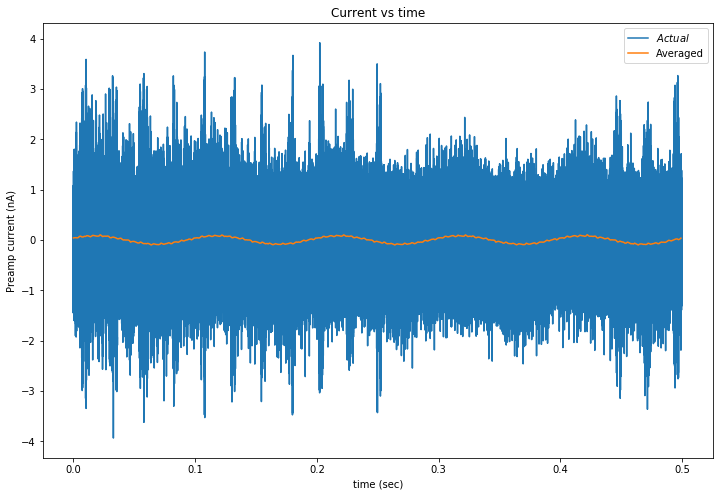

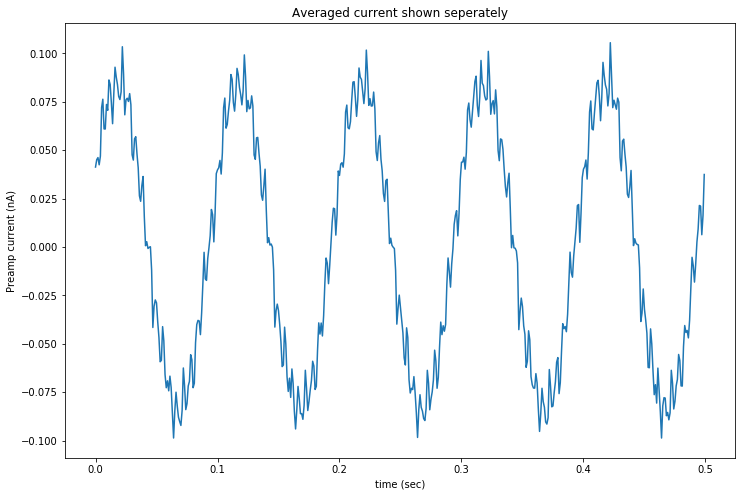

In [71]:
# Averaging to get a desired sampling rate (Similar to sampling rate conversion)

rs_desired = 1e3 #desired sampling rate
n_pointstoaverage = int(rs_acqu/rs_desired) # number of points to be averaged
ns_desired = int(rs_desired*t_acqu) # total number of points for the collected signal in the desired rate
t_desired = np.arange(start=0, stop=t_acqu, step=1/rs_desired)
i_desired = np.zeros(ns_desired)

for index in np.arange(ns_desired):
    i_desired[index] = current_i[index*n_pointstoaverage:(index+1)*n_pointstoaverage].mean()
    
plt.figure(figsize=(12,8))
plt.title('Current vs time')


plt.plot(t,current_i)
plt.plot(t_desired, i_desired)
plt.legend(['$Actual$', 'Averaged'])
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

plt.figure(figsize=(12,8))
plt.plot(t_desired, i_desired)
plt.title('Averaged current shown seperately')
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

## Resistance calculation
V = 10 mvolt <br>
I = 0.1 nA<br>
$R= V/I $

In [73]:
V = 0.01
I = 0.1e-9
R = 1e-6*V/I
print('Resistance is: ', R, 'Mega Ohm')

Resistance is:  100.0 Mega Ohm


Text(0.5, 1.0, 'Frequency response of the actual signal')

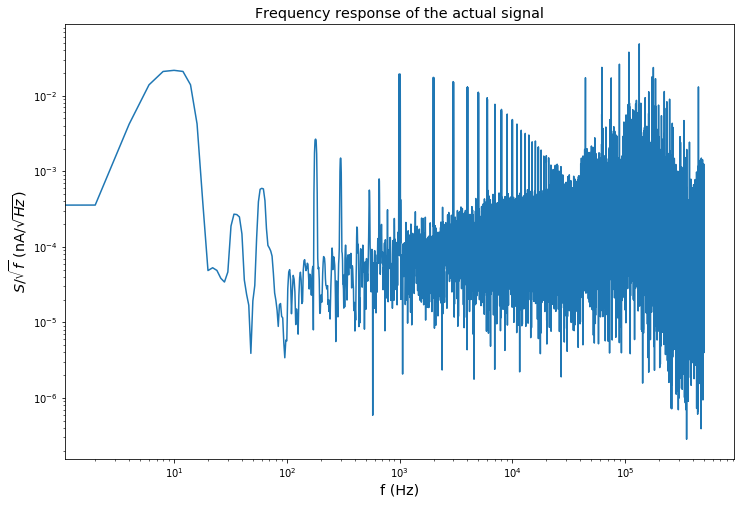

In [75]:
f,II_den=signal.periodogram(current_i,fs=rs_acqu,window='flattop',scaling='density',return_onesided=True)
plt.figure(figsize=(12,8))
plt.loglog(f,np.sqrt(II_den))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the actual signal',fontsize='x-large')

Text(0.5, 1.0, 'Frequency response of the averaged signal')

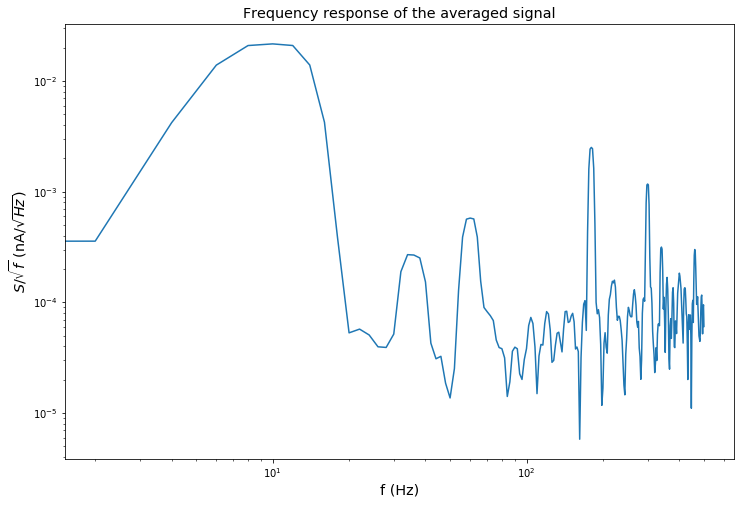

In [77]:
f_desired,II_den_desired=signal.periodogram(i_desired,fs=rs_desired,window='flattop',scaling='density',return_onesided=True)
plt.figure(figsize=(12,8))
plt.loglog(f_desired,np.sqrt(II_den_desired))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the averaged signal',fontsize='x-large')

Text(0.5, 1.0, 'Frequency response')

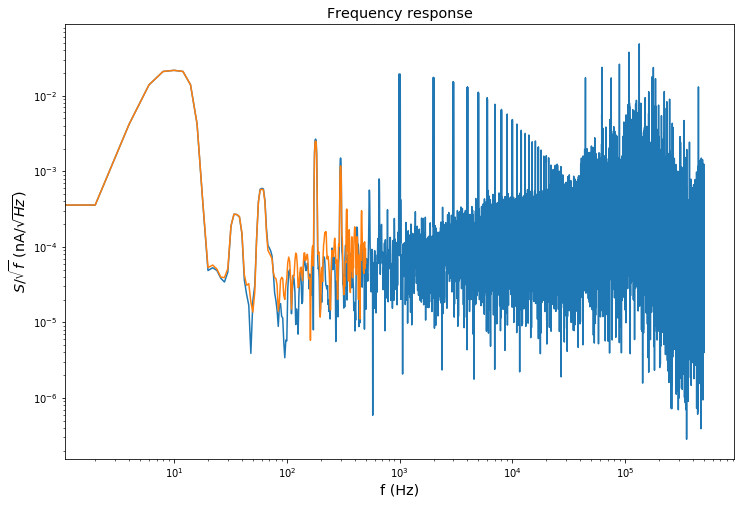

In [78]:
plt.figure(figsize=(12,8))
plt.loglog(f,np.sqrt(II_den))
plt.loglog(f_desired,np.sqrt(II_den_desired))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response',fontsize='x-large')

Text(0.5, 1.0, 'Frequency response of the averaged signal (Linear frequency scale)')

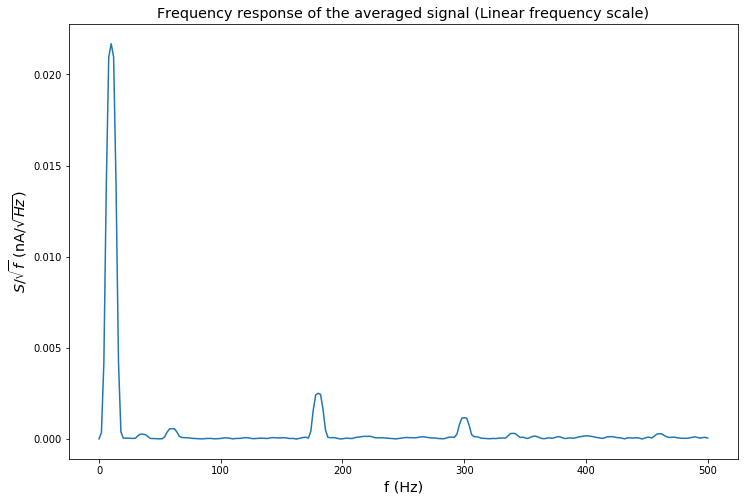

In [79]:
f_desired,II_den_desired=signal.periodogram(i_desired,fs=rs_desired,window='flattop',scaling='density',return_onesided=True)
plt.figure(figsize=(12,8))
plt.plot(f_desired,np.sqrt(II_den_desired))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the averaged signal (Linear frequency scale)',fontsize='x-large')

Frequencies with higher values are:  [  4.   6.   8.  10.  12.  14.  16. 176. 178. 180. 182. 184. 298. 300.
 302.]


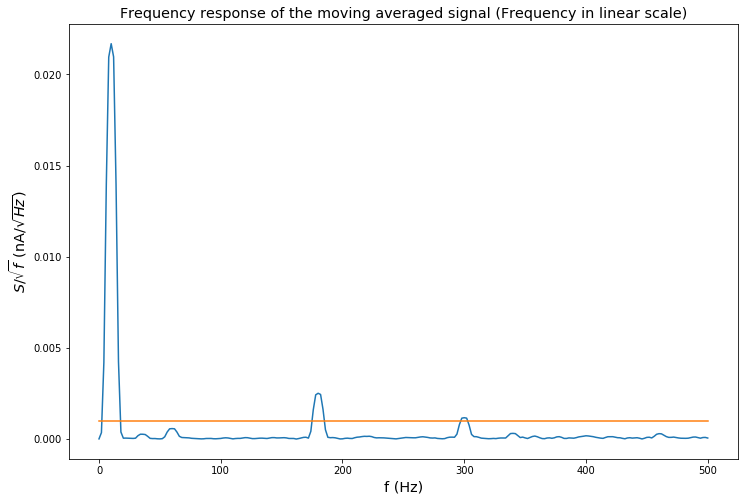

In [82]:
threshold_value = 0.001
plt.figure(figsize=(12,8))
plt.plot(f_desired,np.sqrt(II_den_desired))
plt.plot(f_desired, threshold_value*np.ones(f_desired.size))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the moving averaged signal (Frequency in linear scale)',fontsize='x-large')

positions = np.where(np.sqrt(II_den_desired)>=threshold_value)
print('Frequencies with higher values are: ', f_desired[positions])

# Date: August 4, 2020

## Data acquisition

In [1]:
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
%matplotlib inline

#Constant values

gain = 1e8 # gain of the preamps

# Data collection with NIDAQ at maximum sampling rate

rs_acqu = 1e6 # sampling rate in Hz
t_acqu = 5 # acquisition time in second
ns_acqu = int(rs_acqu*t_acqu)
t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


with nidaqmx.Task() as acqu_task:
    # Set acquisition channels and specs
    # Change the voltage range if necessary
    acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-1,max_val=1)
    acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

    # Start acquisition
    acqu_task.start()
    
    # Collect the data measured
    current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
    current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion

    # Stop acquisition
    acqu_task.stop()
    

Text(0.5, 0, 'time (sec)')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


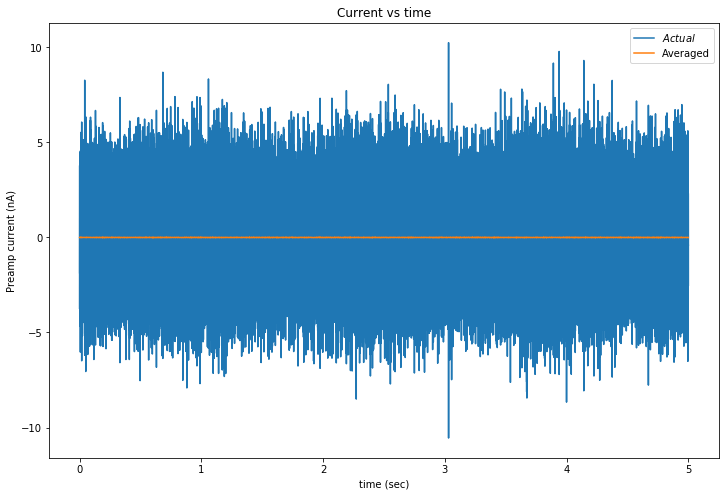

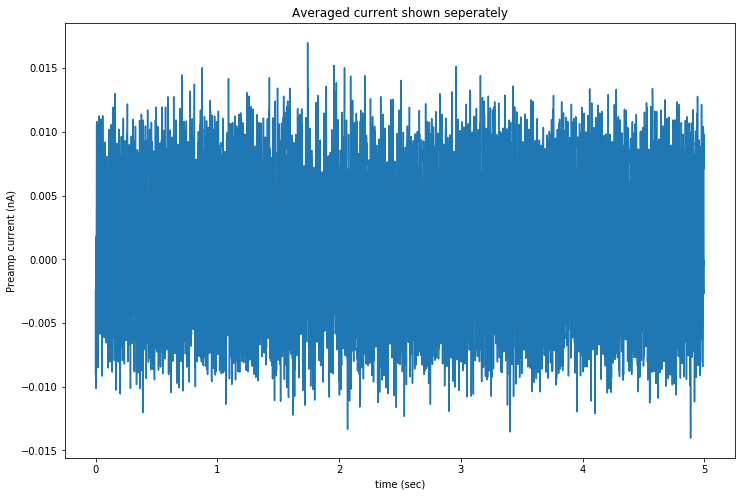

In [2]:
# Averaging to get a desired sampling rate (Similar to sampling rate conversion)

rs_desired = 1e3 #desired sampling rate
n_pointstoaverage = int(rs_acqu/rs_desired) # number of points to be averaged
ns_desired = int(rs_desired*t_acqu) # total number of points for the collected signal in the desired rate
t_desired = np.arange(start=0, stop=t_acqu, step=1/rs_desired)
i_desired = np.zeros(ns_desired)

for index in np.arange(ns_desired):
    i_desired[index] = current_i[index*n_pointstoaverage:(index+1)*n_pointstoaverage].mean()
    
plt.figure(figsize=(12,8))
plt.title('Current vs time')


plt.plot(t,current_i)
plt.plot(t_desired, i_desired)
plt.legend(['$Actual$', 'Averaged'])
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

plt.figure(figsize=(12,8))
plt.plot(t_desired, i_desired)
plt.title('Averaged current shown seperately')
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

## Frequency response

Text(0.5, 1.0, 'Frequency response of the actual signal')

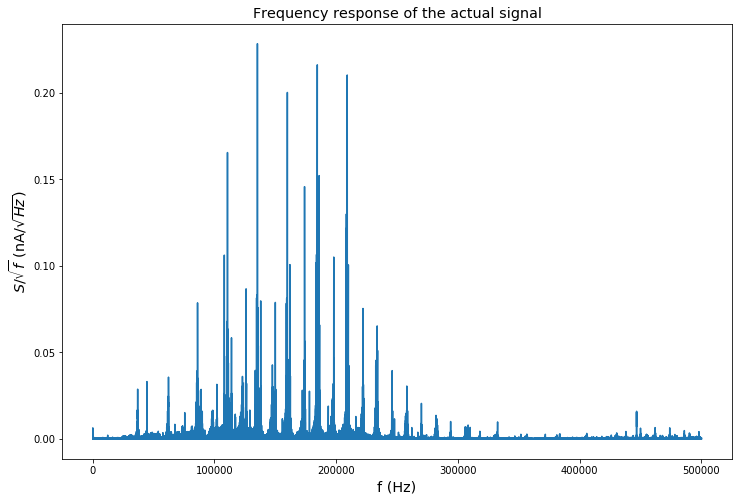

In [3]:
f,II_den=signal.periodogram(current_i,fs=rs_acqu,window='flattop',scaling='density',return_onesided=True)
plt.figure(figsize=(12,8))
plt.plot(f,np.sqrt(II_den))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the actual signal',fontsize='x-large')

Text(0.5, 1.0, 'Frequency response of the averaged signal')

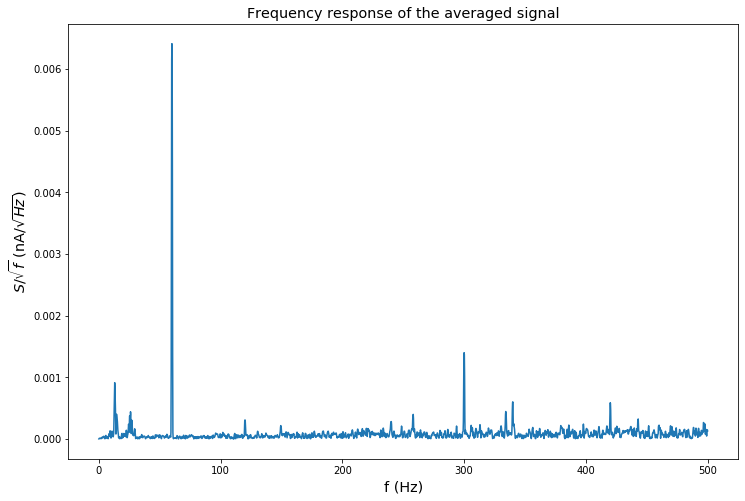

In [4]:
f_desired,II_den_desired=signal.periodogram(i_desired,fs=rs_desired,window='flattop',scaling='density',return_onesided=True)
plt.figure(figsize=(12,8))
plt.plot(f_desired,np.sqrt(II_den_desired))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the averaged signal',fontsize='x-large')

## Initiating QDAC channel 1

Voltage sweeping from -10 mV to +10 mV

In [5]:
# qdacExample.py
# Copyright QDevil ApS, 2018, 2019
VERSION = "1.21"

import qdac
import random
import math

with qdac.qdac('COM3') as q:
    print("QDAC Serial number: %s" % q.getSerialNumber())
    print("Number of channels: %d" % q.getNumberOfChannels())

    print("-----------------------------------------------")

QDAC Serial number: QDAC132401
Number of channels: 24
-----------------------------------------------


In [7]:
with qdac.qdac('COM3') as q:
    print('Voltage at channel 1 is: ', q.getDCVoltage(1), 'V')
    print('Voltage range is: ', q.getVoltageRange(1))

Voltage at channel 1 is:  -0.0 V
Voltage range is:  10.0


In [9]:
with qdac.qdac('COM3') as q:
    q.setVoltageRange(1, 1.0)
    print('Voltage range is: ', q.getVoltageRange(1))

Exception: 1V range not valid in the 100uA current range

In [10]:
with qdac.qdac('COM3') as q:
    q.setCurrentRange(1, 1e-6)
    q.setVoltageRange(1, 1.0)
    print('Voltage range is: ', q.getVoltageRange(1))

Voltage range is:  1.0


In [11]:
%whos

Variable            Type        Data/Info
-----------------------------------------
AcqType             EnumMeta    <enum 'AcquisitionType'>
II_den              ndarray     2500001: 2500001 elems, type `float64`, 20000008 bytes (19.07349395751953 Mb)
II_den_desired      ndarray     2501: 2501 elems, type `float64`, 20008 bytes
TermConfig          EnumMeta    <enum 'TerminalConfiguration'>
VERSION             str         1.21
acqu_task           Task        <object with id 2582307756808 (str() failed)>
current_i           ndarray     5000000: 5000000 elems, type `float64`, 40000000 bytes (38.14697265625 Mb)
f                   ndarray     2500001: 2500001 elems, type `float64`, 20000008 bytes (19.07349395751953 Mb)
f_desired           ndarray     2501: 2501 elems, type `float64`, 20008 bytes
gain                float       100000000.0
i_desired           ndarray     5000: 5000 elems, type `float64`, 40000 bytes
index               int32       4999
math                module      <module

In [13]:
number_of_data_points = 100
V = np.linspace(start= -10e-3, stop= 10e-3, num = number_of_data_points)
I = np.zeros(number_of_data_points)

gain = 1e8 # gain of the preamps

# Data collection with NIDAQ at maximum sampling rate

rs_acqu = 1e6 # sampling rate in Hz
t_acqu = 0.01 # acquisition time in second
ns_acqu = int(rs_acqu*t_acqu)
t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


with qdac.qdac('COM3') as q:
    for i in np.arange(number_of_data_points):
        #setting the DC voltage
        q.setDCVoltage(1, V[i])
        
        #collecting data for V[i]
        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-1,max_val=1)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion

            # Stop acquisition
            acqu_task.stop()
            
            # Averaging
            I[i]=np.mean(current_i)
        

## Ploting the I-V

Text(0.5, 1.0, 'I vs V')

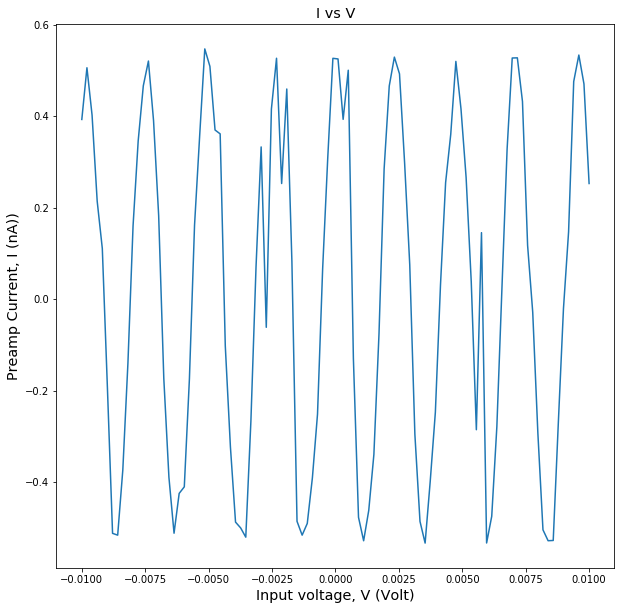

In [14]:
plt.figure(figsize=(10, 10))
plt.plot(V, I)
plt.xlabel('Input voltage, V (Volt)', fontsize='x-large')
plt.ylabel('Preamp Current, I (nA))',fontsize='x-large')
plt.title('I vs V',fontsize='x-large')

## Let's collect 0.1 sec of data for each voltage

In [15]:
number_of_data_points = 100
V = np.linspace(start= -10e-3, stop= 10e-3, num = number_of_data_points)
I = np.zeros(number_of_data_points)

gain = 1e8 # gain of the preamps

# Data collection with NIDAQ at maximum sampling rate

rs_acqu = 1e6 # sampling rate in Hz
t_acqu = 0.1 # acquisition time in second
ns_acqu = int(rs_acqu*t_acqu)
t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


with qdac.qdac('COM3') as q:
    for i in np.arange(number_of_data_points):
        #setting the DC voltage
        q.setDCVoltage(1, V[i])
        
        #collecting data for V[i]
        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-1,max_val=1)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion

            # Stop acquisition
            acqu_task.stop()
            
            # Averaging
            I[i]=np.mean(current_i)
     

Text(0.5, 1.0, 'I vs V')

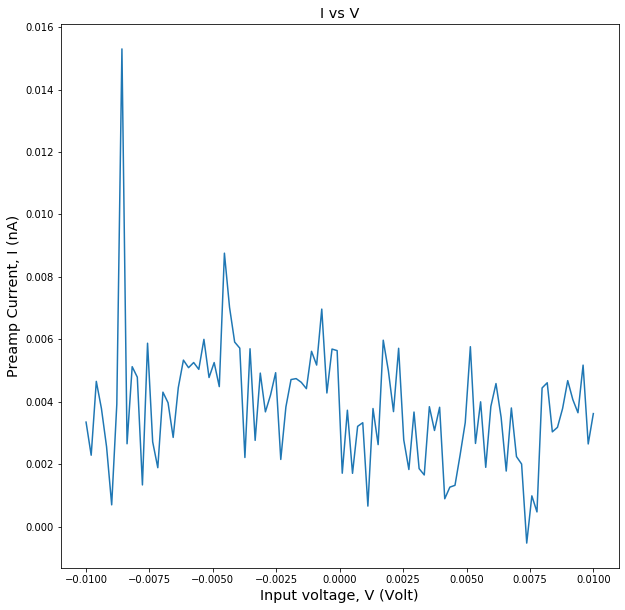

In [17]:
plt.figure(figsize=(10, 10))
plt.plot(V, I)
plt.xlabel('Input voltage, V (Volt)', fontsize='x-large')
plt.ylabel('Preamp Current, I (nA)',fontsize='x-large')
plt.title('I vs V',fontsize='x-large')

# August 25 data

In [1]:
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
%matplotlib inline

#Constant values

gain = 1e8 # gain of the preamps

# Data collection with NIDAQ at maximum sampling rate

rs_acqu = 1e6 # sampling rate in Hz
t_acqu = 5 # acquisition time in second
ns_acqu = int(rs_acqu*t_acqu)
t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


with nidaqmx.Task() as acqu_task:
    # Set acquisition channels and specs
    # Change the voltage range if necessary
    acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-1,max_val=1)
    acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

    # Start acquisition
    acqu_task.start()
    
    # Collect the data measured
    current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
    current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion

    # Stop acquisition
    acqu_task.stop()
    

Text(0.5, 0, 'time (sec)')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


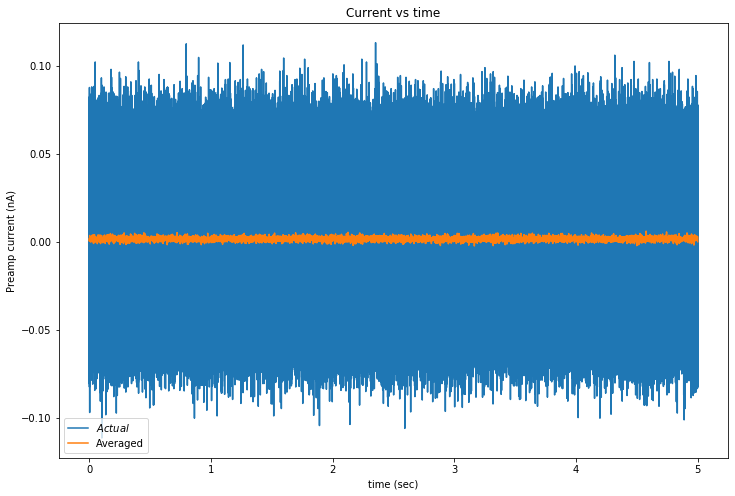

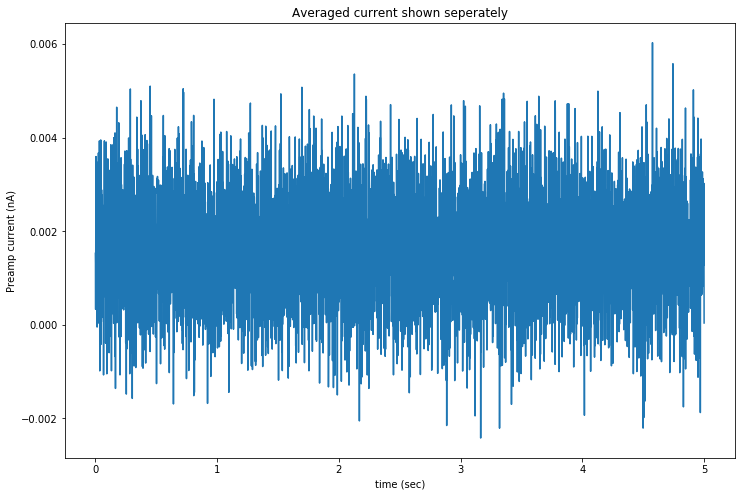

In [2]:
# Averaging to get a desired sampling rate (Similar to sampling rate conversion)

rs_desired = 1e3 #desired sampling rate
n_pointstoaverage = int(rs_acqu/rs_desired) # number of points to be averaged
ns_desired = int(rs_desired*t_acqu) # total number of points for the collected signal in the desired rate
t_desired = np.arange(start=0, stop=t_acqu, step=1/rs_desired)
i_desired = np.zeros(ns_desired)

for index in np.arange(ns_desired):
    i_desired[index] = current_i[index*n_pointstoaverage:(index+1)*n_pointstoaverage].mean()
    
plt.figure(figsize=(12,8))
plt.title('Current vs time')


plt.plot(t,current_i)
plt.plot(t_desired, i_desired)
plt.legend(['$Actual$', 'Averaged'])
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

plt.figure(figsize=(12,8))
plt.plot(t_desired, i_desired)
plt.title('Averaged current shown seperately')
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

In [3]:
# qdacExample.py
# Copyright QDevil ApS, 2018, 2019
VERSION = "1.21"

import qdac
import random
import math

with qdac.qdac('COM3') as q:
    print("QDAC Serial number: %s" % q.getSerialNumber())
    print("Number of channels: %d" % q.getNumberOfChannels())

    print("-----------------------------------------------")
    print("Setting Channel 1 voltage range to 10 V")
    result = q.setVoltageRange(channel=1, theRange=10)

QDAC Serial number: QDAC132401
Number of channels: 24
-----------------------------------------------
Setting Channel 1 voltage range to 10 V


Setting Voltage at channel 1 is:  {'Voltage': -0.0, 'Digital': 27}  V
Setting Voltage at channel 1 is:  {'Voltage': 7.6e-05, 'Digital': 31}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000133, 'Digital': 34}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.00021, 'Digital': 38}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000267, 'Digital': 41}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000343, 'Digital': 45}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000419, 'Digital': 49}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000477, 'Digital': 52}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000553, 'Digital': 56}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000629, 'Digital': 60}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000686, 'Digital': 63}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000763, 'Digital': 67}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.00082, 'Digital': 70}  V
Setting Voltage at channel 1 is:  {'Voltage':

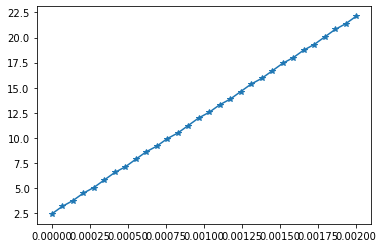

In [16]:
N = 30
voltages = np.linspace(0, 2e-3, num=N)
currents = np.zeros(N)

for i in np.arange(N):
    with qdac.qdac('COM3') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e8 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM3') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

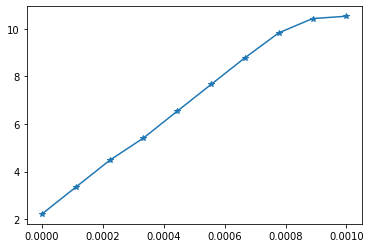

In [11]:
plt.figure()
plt.plot(voltages, currents, '-*')

In [7]:
print(currents)

[1.05411426 1.05411426 1.05411426 1.05411426 1.05411426 1.05411426
 1.05411426 1.05411426 1.05411426 1.05411426]


In [15]:
R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

101477.64981982649


In [ ]:
N = 30
voltages = np.linspace(0, 2e-3, num=N)
currents = np.zeros(N)

for i in np.arange(N):
    with qdac.qdac('COM3') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e8 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM3') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

# August 26 Data

Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': 0.0, 'Digital': 59}  V
Setting Voltage at channel 1 is:  {'Voltage': 7e-06, 'Digital': 62}  V
Setting Voltage at channel 1 is:  {'Voltage': 1.3e-05, 'Digital': 65}  V
Setting Voltage at channel 1 is:  {'Voltage': 2.2e-05, 'Digital': 69}  V
Setting Voltage at channel 1 is:  {'Voltage': 2.8e-05, 'Digital': 72}  V
Setting Voltage at channel 1 is:  {'Voltage': 3.4e-05, 'Digital': 75}  V
Setting Voltage at channel 1 is:  {'Voltage': 4.1e-05, 'Digital': 78}  V
Setting Voltage at channel 1 is:  {'Voltage': 4.9e-05, 'Digital': 82}  V
Setting Voltage at channel 1 is:  {'Voltage': 5.5e-05, 'Digital': 85}  V
Setting Voltage at channel 1 is:  {'Voltage': 6.2e-05, 'Digital': 88}  V
Setting Voltage at channel 1 is:  {'Voltage': 6.8e-05, 'Digital': 91}  V
Setting Voltage at channel 1 is:  {'Voltage': 7.7e-05, 'Digital': 95}  V
Setting Voltage at channel 1 is:

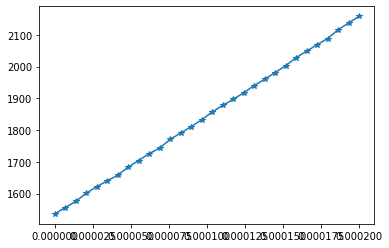

In [23]:
N = 30
voltages = np.linspace(0, 200e-6, num=N)
currents = np.zeros(N)

with qdac.qdac('COM3') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM3') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM3') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

In [24]:
R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

321.07650116512445


This data is between pin 18 and 23

Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': 0.0, 'Digital': 59}  V
Setting Voltage at channel 1 is:  {'Voltage': 7e-06, 'Digital': 62}  V
Setting Voltage at channel 1 is:  {'Voltage': 1.3e-05, 'Digital': 65}  V
Setting Voltage at channel 1 is:  {'Voltage': 2.2e-05, 'Digital': 69}  V
Setting Voltage at channel 1 is:  {'Voltage': 2.8e-05, 'Digital': 72}  V
Setting Voltage at channel 1 is:  {'Voltage': 3.4e-05, 'Digital': 75}  V
Setting Voltage at channel 1 is:  {'Voltage': 4.1e-05, 'Digital': 78}  V
Setting Voltage at channel 1 is:  {'Voltage': 4.9e-05, 'Digital': 82}  V
Setting Voltage at channel 1 is:  {'Voltage': 5.5e-05, 'Digital': 85}  V
Setting Voltage at channel 1 is:  {'Voltage': 6.2e-05, 'Digital': 88}  V
Setting Voltage at channel 1 is:  {'Voltage': 6.8e-05, 'Digital': 91}  V
Setting Voltage at channel 1 is:  {'Voltage': 7.7e-05, 'Digital': 95}  V
Setting Voltage at channel 1 is:

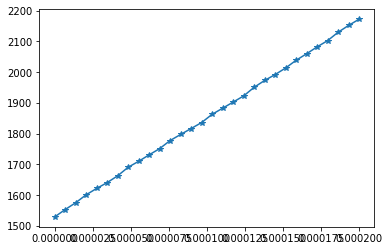

In [27]:
N = 30
voltages = np.linspace(0, 200e-6, num=N)
currents = np.zeros(N)

with qdac.qdac('COM3') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM3') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM3') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

In [28]:
R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

310.87234815868214


Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.000201, 'Digital': 1048540}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000186, 'Digital': 1048547}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000173, 'Digital': 1048553}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000159, 'Digital': 1048560}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000146, 'Digital': 1048566}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000131, 'Digital': 1048573}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000116, 'Digital': 4}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000103, 'Digital': 10}  V
Setting Voltage at channel 1 is:  {'Voltage': -8.9e-05, 'Digital': 17}  V
Setting Voltage at channel 1 is:  {'Voltage': -7.6e-05, 'Digital': 23}  V
Setting Voltage at channel 1 is:  {'Voltage': -6.1e-05, 'Digital': 30}  V
Setting Voltage at channel 1 is:  {'Voltage': -4.8e

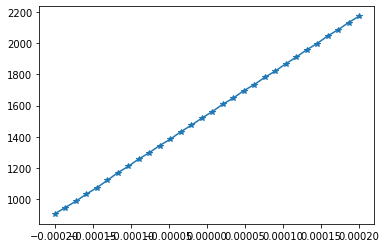

In [34]:
N = 30
voltages = np.linspace(-200e-6, 200e-6, num=N)
currents = np.zeros(N)

with qdac.qdac('COM3') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM3') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM3') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

In [33]:
with qdac.qdac('COM3') as q:
        print('Getting voltage at channel 1: ', q.getDCVoltage(2))

Getting voltage at channel 1:  7e-06


Setting Voltage at channel 1 is:  {'Voltage': -9.7e-05, 'Digital': 22}  V
Setting Voltage at channel 1 is:  {'Voltage': -9.7e-05, 'Digital': 22}  V
Setting Voltage at channel 1 is:  {'Voltage': -7.8e-05, 'Digital': 23}  V
Setting Voltage at channel 1 is:  {'Voltage': -7.8e-05, 'Digital': 23}  V
Setting Voltage at channel 1 is:  {'Voltage': -5.9e-05, 'Digital': 24}  V
Setting Voltage at channel 1 is:  {'Voltage': -4e-05, 'Digital': 25}  V
Setting Voltage at channel 1 is:  {'Voltage': -4e-05, 'Digital': 25}  V
Setting Voltage at channel 1 is:  {'Voltage': -2.1e-05, 'Digital': 26}  V
Setting Voltage at channel 1 is:  {'Voltage': -2.1e-05, 'Digital': 26}  V
Setting Voltage at channel 1 is:  {'Voltage': -2e-06, 'Digital': 27}  V
Setting Voltage at channel 1 is:  {'Voltage': -2e-06, 'Digital': 27}  V
Setting Voltage at channel 1 is:  {'Voltage': 1.7e-05, 'Digital': 28}  V
Setting Voltage at channel 1 is:  {'Voltage': 1.7e-05, 'Digital': 28}  V
Setting Voltage at channel 1 is:  {'Voltage': 3.

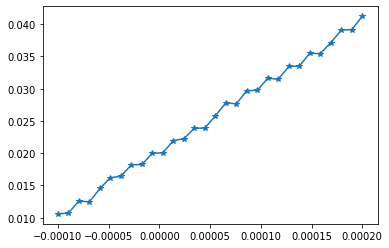

In [39]:
N = 30
voltages = np.linspace(-1e-4, 2e-4, num=N)
currents = np.zeros(N)

for i in np.arange(N):
    with qdac.qdac('COM3') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(3, voltages[i]), ' V')
        gain = 1e8 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM3') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

In [40]:
with qdac.qdac('COM3') as q:
        q.restart()

Setting Voltage at channel 1 is:  {'Voltage': -0.0, 'Digital': 27}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.0, 'Digital': 27}  V
Setting Voltage at channel 1 is:  {'Voltage': 1.9e-05, 'Digital': 28}  V
Setting Voltage at channel 1 is:  {'Voltage': 1.9e-05, 'Digital': 28}  V
Setting Voltage at channel 1 is:  {'Voltage': 1.9e-05, 'Digital': 28}  V
Setting Voltage at channel 1 is:  {'Voltage': 3.8e-05, 'Digital': 29}  V
Setting Voltage at channel 1 is:  {'Voltage': 3.8e-05, 'Digital': 29}  V
Setting Voltage at channel 1 is:  {'Voltage': 5.7e-05, 'Digital': 30}  V
Setting Voltage at channel 1 is:  {'Voltage': 5.7e-05, 'Digital': 30}  V
Setting Voltage at channel 1 is:  {'Voltage': 5.7e-05, 'Digital': 30}  V
Setting Voltage at channel 1 is:  {'Voltage': 7.6e-05, 'Digital': 31}  V
Setting Voltage at channel 1 is:  {'Voltage': 7.6e-05, 'Digital': 31}  V
Setting Voltage at channel 1 is:  {'Voltage': 7.6e-05, 'Digital': 31}  V
Setting Voltage at channel 1 is:  {'Voltage': 9.5e-05, 'D

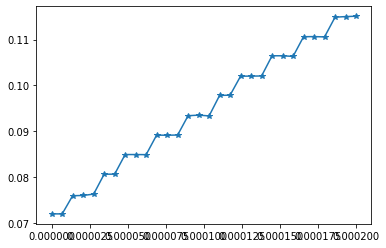

In [43]:
N = 30
voltages = np.linspace(0, 2e-4, num=N)
currents = np.zeros(N)

for i in np.arange(N):
    with qdac.qdac('COM3') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM3') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': 0.0, 'Digital': 59}  V
Setting Voltage at channel 1 is:  {'Voltage': 1.7e-05, 'Digital': 67}  V
Setting Voltage at channel 1 is:  {'Voltage': 3.4e-05, 'Digital': 75}  V
Setting Voltage at channel 1 is:  {'Voltage': 5.1e-05, 'Digital': 83}  V
Setting Voltage at channel 1 is:  {'Voltage': 6.8e-05, 'Digital': 91}  V
Setting Voltage at channel 1 is:  {'Voltage': 8.7e-05, 'Digital': 100}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000104, 'Digital': 108}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000121, 'Digital': 116}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000138, 'Digital': 124}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000155, 'Digital': 132}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000172, 'Digital': 140}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000189, 'Digital': 148}  V
Setting Voltage a

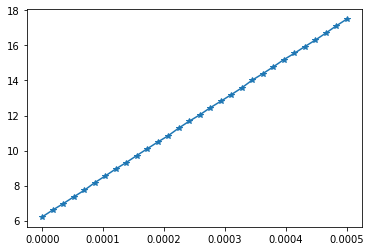

In [46]:
N = 30
voltages = np.linspace(0, 500e-6, num=N)
currents = np.zeros(N)

with qdac.qdac('COM3') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM3') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM3') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

In [47]:
R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)


44325.2663096038


Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': 0.0, 'Digital': 59}  V
Setting Voltage at channel 1 is:  {'Voltage': 1.7e-05, 'Digital': 67}  V
Setting Voltage at channel 1 is:  {'Voltage': 3.4e-05, 'Digital': 75}  V
Setting Voltage at channel 1 is:  {'Voltage': 5.1e-05, 'Digital': 83}  V
Setting Voltage at channel 1 is:  {'Voltage': 6.8e-05, 'Digital': 91}  V
Setting Voltage at channel 1 is:  {'Voltage': 8.7e-05, 'Digital': 100}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000104, 'Digital': 108}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000121, 'Digital': 116}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000138, 'Digital': 124}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000155, 'Digital': 132}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000172, 'Digital': 140}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000189, 'Digital': 148}  V
Setting Voltage a

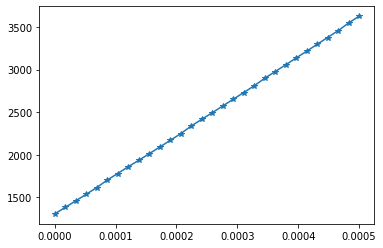

In [48]:
N = 30
voltages = np.linspace(0, 500e-6, num=N)
currents = np.zeros(N)

with qdac.qdac('COM3') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM3') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM3') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

In [49]:
R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

215.73842868932977


Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': 0.0, 'Digital': 59}  V
Setting Voltage at channel 1 is:  {'Voltage': 1.7e-05, 'Digital': 67}  V
Setting Voltage at channel 1 is:  {'Voltage': 3.4e-05, 'Digital': 75}  V
Setting Voltage at channel 1 is:  {'Voltage': 5.1e-05, 'Digital': 83}  V
Setting Voltage at channel 1 is:  {'Voltage': 6.8e-05, 'Digital': 91}  V
Setting Voltage at channel 1 is:  {'Voltage': 8.7e-05, 'Digital': 100}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000104, 'Digital': 108}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000121, 'Digital': 116}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000138, 'Digital': 124}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000155, 'Digital': 132}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000172, 'Digital': 140}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000189, 'Digital': 148}  V
Setting Voltage a

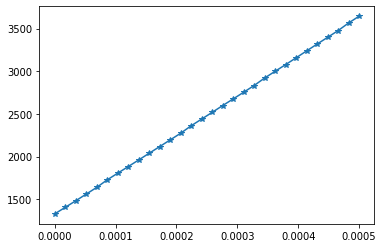

In [50]:
N = 30
voltages = np.linspace(0, 500e-6, num=N)
currents = np.zeros(N)

with qdac.qdac('COM3') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM3') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM3') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': 0.0, 'Digital': 59}  V
Setting Voltage at channel 1 is:  {'Voltage': 1.7e-05, 'Digital': 67}  V
Setting Voltage at channel 1 is:  {'Voltage': 3.4e-05, 'Digital': 75}  V
Setting Voltage at channel 1 is:  {'Voltage': 5.1e-05, 'Digital': 83}  V
Setting Voltage at channel 1 is:  {'Voltage': 6.8e-05, 'Digital': 91}  V
Setting Voltage at channel 1 is:  {'Voltage': 8.7e-05, 'Digital': 100}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000104, 'Digital': 108}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000121, 'Digital': 116}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000138, 'Digital': 124}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000155, 'Digital': 132}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000172, 'Digital': 140}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000189, 'Digital': 148}  V
Setting Voltage a

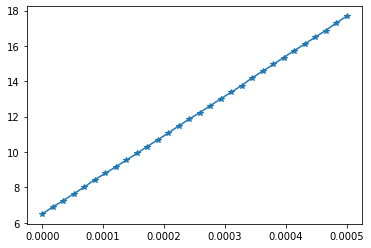

In [51]:
N = 30
voltages = np.linspace(0, 500e-6, num=N)
currents = np.zeros(N)

with qdac.qdac('COM3') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM3') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM3') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': 0.0, 'Digital': 59}  V
Setting Voltage at channel 1 is:  {'Voltage': 1.7e-05, 'Digital': 67}  V
Setting Voltage at channel 1 is:  {'Voltage': 3.4e-05, 'Digital': 75}  V
Setting Voltage at channel 1 is:  {'Voltage': 5.1e-05, 'Digital': 83}  V
Setting Voltage at channel 1 is:  {'Voltage': 6.8e-05, 'Digital': 91}  V
Setting Voltage at channel 1 is:  {'Voltage': 8.7e-05, 'Digital': 100}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000104, 'Digital': 108}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000121, 'Digital': 116}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000138, 'Digital': 124}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000155, 'Digital': 132}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000172, 'Digital': 140}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000189, 'Digital': 148}  V
Setting Voltage a

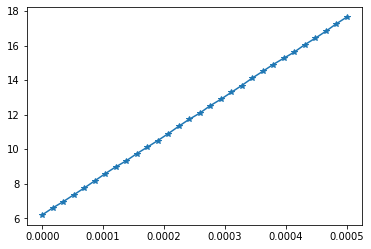

In [52]:
N = 30
voltages = np.linspace(0, 500e-6, num=N)
currents = np.zeros(N)

with qdac.qdac('COM3') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM3') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM3') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': 0.0, 'Digital': 59}  V
Setting Voltage at channel 1 is:  {'Voltage': 1.7e-05, 'Digital': 67}  V
Setting Voltage at channel 1 is:  {'Voltage': 3.4e-05, 'Digital': 75}  V
Setting Voltage at channel 1 is:  {'Voltage': 5.1e-05, 'Digital': 83}  V
Setting Voltage at channel 1 is:  {'Voltage': 6.8e-05, 'Digital': 91}  V
Setting Voltage at channel 1 is:  {'Voltage': 8.7e-05, 'Digital': 100}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000104, 'Digital': 108}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000121, 'Digital': 116}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000138, 'Digital': 124}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000155, 'Digital': 132}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000172, 'Digital': 140}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000189, 'Digital': 148}  V
Setting Voltage a

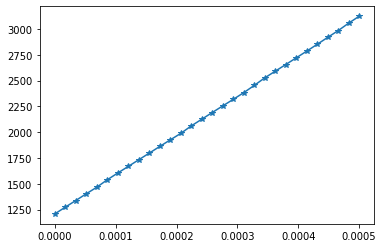

In [53]:
N = 30
voltages = np.linspace(0, 500e-6, num=N)
currents = np.zeros(N)

with qdac.qdac('COM3') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM3') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM3') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': 0.0, 'Digital': 59}  V
Setting Voltage at channel 1 is:  {'Voltage': 1.7e-05, 'Digital': 67}  V
Setting Voltage at channel 1 is:  {'Voltage': 3.4e-05, 'Digital': 75}  V
Setting Voltage at channel 1 is:  {'Voltage': 5.1e-05, 'Digital': 83}  V
Setting Voltage at channel 1 is:  {'Voltage': 6.8e-05, 'Digital': 91}  V
Setting Voltage at channel 1 is:  {'Voltage': 8.7e-05, 'Digital': 100}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000104, 'Digital': 108}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000121, 'Digital': 116}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000138, 'Digital': 124}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000155, 'Digital': 132}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000172, 'Digital': 140}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000189, 'Digital': 148}  V
Setting Voltage a

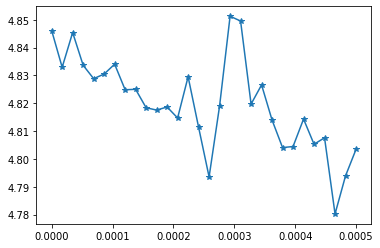

In [54]:
N = 30
voltages = np.linspace(0, 500e-6, num=N)
currents = np.zeros(N)

with qdac.qdac('COM3') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM3') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM3') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': 0.0, 'Digital': 59}  V
Setting Voltage at channel 1 is:  {'Voltage': 1.7e-05, 'Digital': 67}  V
Setting Voltage at channel 1 is:  {'Voltage': 3.4e-05, 'Digital': 75}  V
Setting Voltage at channel 1 is:  {'Voltage': 5.1e-05, 'Digital': 83}  V
Setting Voltage at channel 1 is:  {'Voltage': 6.8e-05, 'Digital': 91}  V
Setting Voltage at channel 1 is:  {'Voltage': 8.7e-05, 'Digital': 100}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000104, 'Digital': 108}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000121, 'Digital': 116}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000138, 'Digital': 124}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000155, 'Digital': 132}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000172, 'Digital': 140}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000189, 'Digital': 148}  V
Setting Voltage a

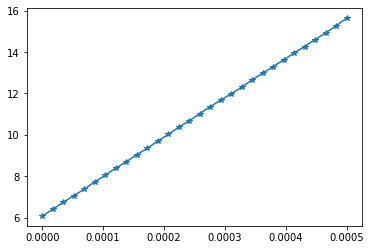

In [55]:
N = 30
voltages = np.linspace(0, 500e-6, num=N)
currents = np.zeros(N)

with qdac.qdac('COM3') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM3') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM3') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

In [61]:
rho = 1e10
L = 10e-9
A = 2.5e-3*5e-3
Resistance = rho*L/A
print('Resistance of the 10 nm thick AlOx is: ', Resistance/1e6, 'MOhm')

Resistance of the 10 nm thick AlOx is:  8.0 MOhm
